In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

# Monte Carlo 시뮬레이션 간단 예제 (적분)

100%|██████████| 5000000/5000000 [00:29<00:00, 166913.10it/s]


π 값 3.1423632


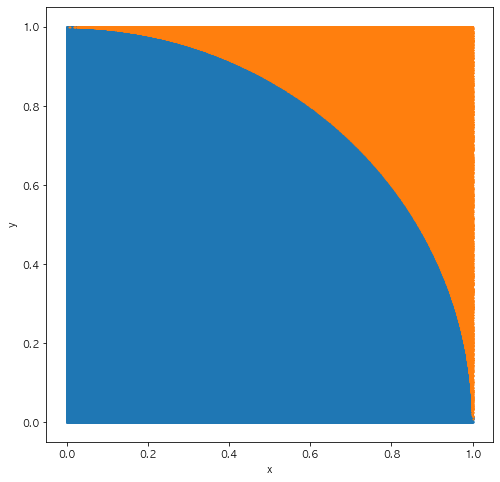

In [3]:
from tqdm import tqdm
import pandas as pd
import numpy as np

# 변수 설정
n = 5000000
count = 0
x_list_under = []
y_list_under = []
x_list_upper = []
y_list_upper = []

for i in tqdm(range(n)):
    # 시드 부여 (난수)
    np.random.seed(i)
    # 0,1 사이의 난수 값 생성
    x = np.random.random()
    y = np.random.random()
    # 원 내부에 있는 점을 만족하는 경우, 그렇지 않은 경우 분리
    if (x**2 + y**2) <= 1: 
        count += 1
        x_list_under.append(x)
        y_list_under.append(y)
    else:
        x_list_upper.append(x)
        y_list_upper.append(y)
    
# 원 내부일 확률은 원 넓이의 1/4 이므로 곱하기 4로 π 계산
print('\u03C0 값', 4*count/n)

under = pd.DataFrame(zip(x_list_under,y_list_under), columns=['x_under', 'y_under'])
upper = pd.DataFrame(zip(x_list_upper,y_list_upper), columns=['x_upper', 'y_upper'])

plt.figure(figsize=(8,8))
plt.scatter(under['x_under'], under['y_under'], s=1)
plt.scatter(upper['x_upper'], upper['y_upper'], s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Monte Carlo 시뮬레이션을 통해 BLUE의 특성 증명

## 1. Simple 예시를 통한 회귀계수 도출

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 시드 부여
np.random.seed(2022)

# 임의의 모수 값 지정
N = 100
beta_0 = 10
beta_1 = 0.5

# 샘플 데이터 형성
x = np.arange(start = 0, stop = N + 1, step = 1)
resid = np.random.normal(loc = 0, scale = 7, size = len(x))
y_hat = beta_0 + beta_1 * x + resid
y = beta_0 + beta_1 * x

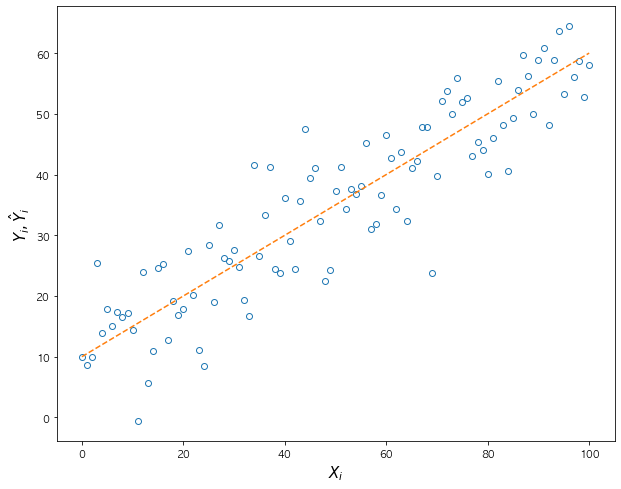

In [5]:
# 시각화
plt.figure(figsize = (10, 8))
plt.plot(x, y_hat, linestyle = "None", marker = "o", markerfacecolor = 'none')
plt.plot(x, y, linestyle = "dashed")
plt.xlabel(r'$X_{i}$', size=15)
plt.ylabel(r'$Y_{i}, \hat Y_{i}$', size=15)
plt.show()

In [6]:
import statsmodels.api as sm

# 회귀 분석 시행
model = sm.OLS(y_hat, sm.add_constant(x)).fit()
print(model.summary())
print(f'상수항(beta_0)의 추정 값 : {model.params[0]}')
print(f'회귀계수(beta_1)의 추정 값 : {model.params[1]}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     445.0
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           2.07e-38
Time:                        13:02:14   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8020      1.324      8.161      0.0

## 2. Simple 예시의 반복 시행

In [7]:
# 라이브러리 호출
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

# 회귀계수 추정값 리스트 생성
beta_0_list = []
beta_1_list = []

# 몬테카를로 시뮬레이션 시행횟수 지정
simulation = 100000

# 임의의 모수 값 지정
beta_0 = 10
beta_1 = 0.5

# sample 데이터 개수 설정
N = 25

for i in tqdm(range(simulation)):
    # 시드 부여
    np.random.seed(i)

    # 샘플 데이터 형성
    x = np.arange(start = 0, stop = N + 1, step = 1)
    resid = np.random.normal(loc = 0, scale = 7, size = len(x))
    y_hat = beta_0 + beta_1 * x + resid
    
    # 회귀 분석 시행
    model = sm.OLS(y_hat, sm.add_constant(x)).fit()
    
    # 회귀계수 추정치 리스트에 추가
    beta_0_list.append(model.params[0])
    beta_1_list.append(model.params[1])
    
print(f'상수항(beta_0)의 추정 값 : {np.mean(beta_0_list)}')
print(f'회귀계수(beta_1)의 추정 값 : {np.mean(beta_1_list)}')

100%|██████████| 100000/100000 [01:12<00:00, 1374.00it/s]

상수항(beta_0)의 추정 값 : 9.989879731745281
회귀계수(beta_1)의 추정 값 : 0.5002362491438527


/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


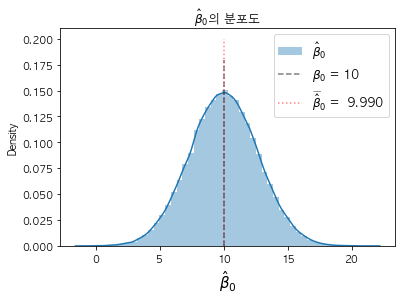

In [8]:
# beta_0 시각화

sns.distplot(beta_0_list, label='$\hat\u03B2_0$')
plt.vlines(x=beta_0, ymin=0, ymax=0.18, alpha = .5, colors='k', linestyles='dashed', label=f'$\u03B2_0$ = {beta_0}')
plt.vlines(x=np.mean(beta_0_list), ymin=0, ymax=0.20, alpha = .5 ,colors='r', linestyles='dotted', label=f'$\widebar\hat\u03B2_0$ = {np.mean(beta_0_list) : .3f}')
plt.title(r'$\hat \beta_{0}$의 분포도')
plt.xlabel(r'$\hat \beta_{0}$', size = 15)
plt.legend(fontsize = 12)
plt.show()

/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


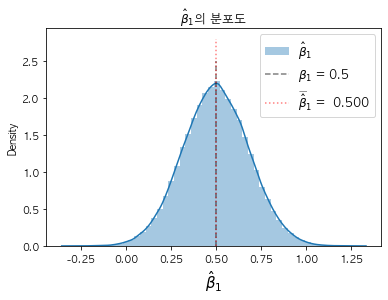

In [9]:
# beta_1 시각화

sns.distplot(beta_1_list, label='$\hat\u03B2_1$')
plt.vlines(x=beta_1, ymin=0, ymax=2.5, alpha = .5, colors='k', linestyles='dashed', label=f'$\u03B2_1$ = {beta_1}')
plt.vlines(x=np.mean(beta_1_list), ymin=0, ymax=2.8, alpha = .5 ,colors='r', linestyles='dotted', label=f'$\widebar\hat\u03B2_1$ = {np.mean(beta_1_list) : .3f}')
plt.title(r'$\hat \beta_{1}$의 분포도')
plt.xlabel(r'$\hat \beta_{1}$', size = 15)
plt.legend(fontsize = 12)
plt.show()

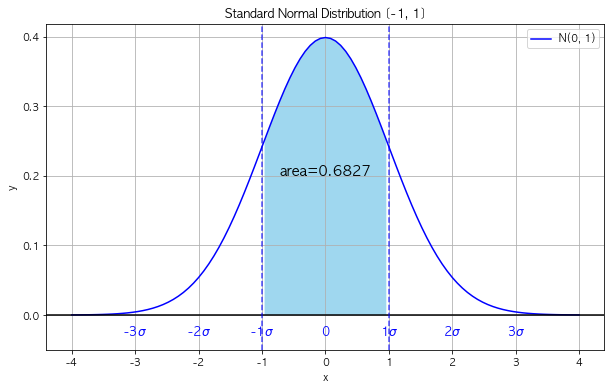

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import Symbol, exp, sqrt, pi, Integral

import scipy.stats as stats
x = Symbol('x')
f = exp(-x ** 2 / 2) / sqrt(2 * pi)
area = Integral(f, (x, -1, 1)).doit().evalf()

# plot 작성
x = np.linspace(-4, 4, 101)          # x 정의
y = stats.norm(0, 1).pdf(x)        

plt.figure(figsize=(10, 6))          # 플롯 사이즈 지정
plt.plot(x, y, color="blue")         # 선을 파랑색으로 지정하여 plot 작성

plt.axhline(0, color='black')        # x축을 수평선으로 표시

# 정해진 범위 [-1, 1]에 파란색 점선으로 수직선 표시
plt.axvline(-1, linestyle='--', color='blue', alpha=.7)
plt.axvline(1, linestyle='--', color='blue', alpha=.7)

# 정해진 범위 [-1, 1] 내에 하늘색으로 면적 칠하기
plt.fill_between(x, 0, y, where=(x >= -1) & (x <= 1), facecolor='skyblue', alpha=.8,)

# 표준편차를 그리스 문자로 표시
for i in range(7):
    j = i - 3
    plt.text(j, -.03, '0' if (j == 0) else str(j) + r'$\sigma$', 
             fontsize=12, horizontalalignment='center', color='blue')

# 면적을 텍스트로 표시
plt.text(0, .2, 'area=' + str(round(area, 4)), fontsize=14, horizontalalignment='center')

plt.xlabel("x")                      # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.ylim(-.05, )
plt.grid()                           # 플롯에 격자 보이기
plt.title("Standard Normal Distribution [-1, 1]")     # 타이틀 표시
plt.legend(["N(0, 1)"])              # 범례 표시
plt.show()                           # 플롯 보이기